# Analiza zamówień

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('orders_dataset.csv')

# ETAP 1

Sprawdzenie danych

In [ ]:

df.head()
df.info()
df.describe()
df.isna().sum()

# ETAP 2

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['total_value'] = df['quantity']*df['price_per_unit']
df = df.sort_values('total_value', ascending=False)
df

# ETAP 3 - Analiza sprzedazowa

Łączny przychód i średnia wartość zamówienia

In [ ]:
##łączny przychód
suma = df['total_value'].sum()
#suma
##średnia wartość zamówienia
srednia = df['total_value'].mean()
#srednia

Najbardziej dochodowy produkt

In [ ]:

produkty = df.groupby('product_name')['total_value'].sum().sort_values(ascending=False)
maxindeks = produkty.idxmax()
max2 = produkty.max()
print(f"Najbardziej dochodowy produkt to: {maxindeks} - {max2}")



Najbardziej dochodowy produkt to: shoes - 19151


Która kategoria generuje największy przychód?

In [79]:

kategorie = df.groupby('product_category')['total_value'].sum().sort_values(ascending=False)
maxindeks = kategorie.idxmax()
max = kategorie.max()
print(f"Najbardziej dochodowa kategoria to: {maxindeks} - {max2}")

Najbardziej dochodowa kategoria to: toys - 19151


Średni przychód na zamówienie dla kategorii

In [ ]:

##ile sprzedanych sztuk dla kategori?
sztuki = df.groupby('product_category')['quantity'].sum().sort_values(ascending=False)
##średni przychód per zamówienie
sredni_przychod = kategorie/sztuki
sredni_przychod


Najbardziej dochodowa kategoria to: ('toys', 19151)


product_category
beauty         154.198198
electronics    141.140351
fashion        157.377358
home           159.554622
sports         142.250000
toys           146.655052
dtype: float64

# ETAP 4 - Analiza w czasie


Przychód miesięczny

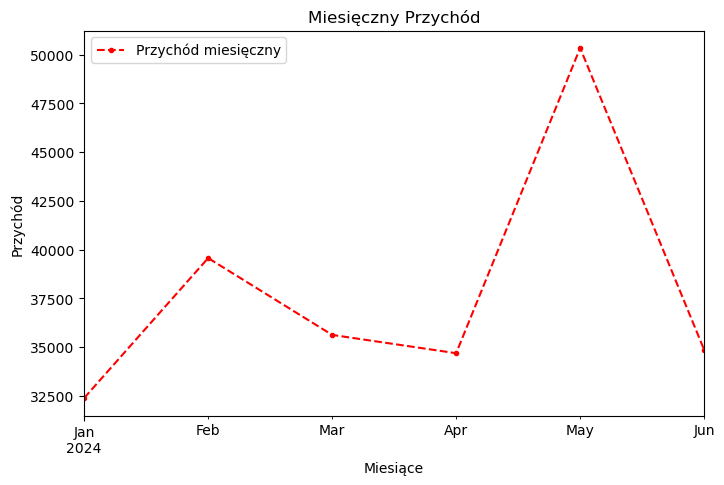

In [ ]:

df['month'] = df['date'].dt.to_period('M')
przychód_m = df.groupby('month')['total_value'].sum().sort_index()
przychód_m
plt.figure(figsize = (8,5))
przychód_m.plot(style='r.--', label = 'Przychód miesięczny')
plt.legend()
plt.title("Miesięczny Przychód")
plt.xlabel("Miesiące")
plt.ylabel("Przychód")

plt.show()

Liczba zamówien na miesiac

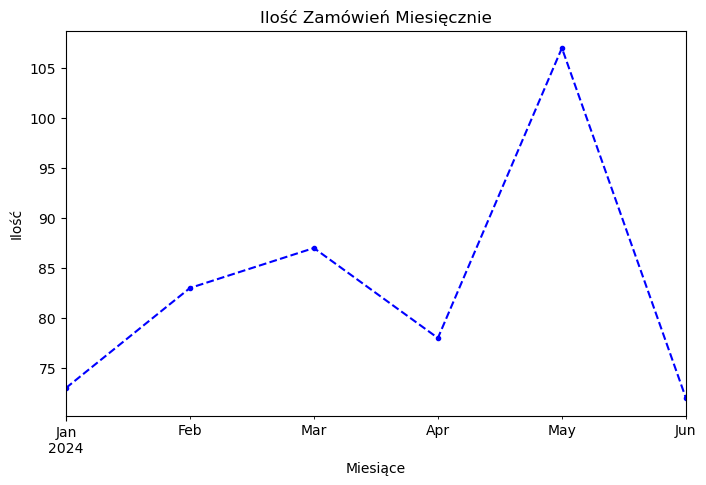

In [65]:

liczba_zamowien = df.groupby('month')['order_id'].count()
liczba_zamowien
plt.figure(figsize=(8,5))
liczba_zamowien.plot(style='b.--', label = 'Liczba zamówień')
plt.title("Ilość Zamówień Miesięcznie")
plt.xlabel("Miesiące")
plt.ylabel("Ilość")
plt.show()


Średnia wartość koszyka w kazdym miesiącu

In [ ]:

sredni_koszyk = df.groupby('month')['total_value'].mean()
sredni_koszyk

month
2024-01    443.630137
2024-02    476.650602
2024-03    409.448276
2024-04    444.653846
2024-05    470.401869
2024-06    484.125000
Freq: M, Name: total_value, dtype: float64

MAX / MIN miesiąc

In [ ]:

najlepszy_miesiac = przychód_m.idxmax()
liczba_max = przychód_m.max()
najgorszy_miesiac = przychód_m.idxmin()
liczba_min = przychód_m.min()
print(f"Najlepszy miesiąc to: {najlepszy_miesiac} - {liczba_max}")
print(f"Najgorszy miesiąc to: {najgorszy_miesiac} - {liczba_min}")


Najlepszy miesiąc to: 2024-05 - 50333
Najgorszy miesiąc to: 2024-01 - 32385


# ETAP 5 - Analiza klientów

Ilu klientów kupiło wiecej niz 1?

In [ ]:

liczba_klientów = df.groupby('customer_id')['order_id'].count()
liczba_klientów_w1 = liczba_klientów.loc[liczba_klientów>1].count()
liczba_klientów_w1

np.int64(87)

Kto najwięcej wydał?

In [ ]:

ile_wydali = df.groupby('customer_id')['total_value'].sum()
ile_wydali
max_klient = ile_wydali.idxmax()
max_zamowienie = ile_wydali.max()
print(f"Klient który najwięcej wydał to: {max_klient}, wydał : {max_zamowienie}")

customer_id
1000     224
1002     596
1003     336
1004     858
1012     390
        ... 
1990     819
1993     304
1995    1051
1996     818
1998     522
Name: total_value, Length: 393, dtype: int64

Podział na segmenty

In [ ]:

klienci = df.groupby('customer_id')['total_value'].sum()
klienci_segment = klienci.copy()
klienci_segment.loc[(klienci > 200) & (klienci < 500)] = 'low-value'
klienci_segment.loc[(klienci >= 500) & (klienci < 1000)] = 'mid-value'
klienci_segment.loc[klienci >= 1000] = 'high-value'
klienci_segment

/var/folders/pf/bltyd1c16ms154t9zv6zvp6m0000gn/T/ipykernel_4703/2812823035.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low-value' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  klienci_segment.loc[(klienci > 200) & (klienci < 500)] = 'low-value'


customer_id
1000     low-value
1002     mid-value
1003     low-value
1004     mid-value
1012     low-value
           ...    
1990     mid-value
1993     low-value
1995    high-value
1996     mid-value
1998     mid-value
Name: total_value, Length: 393, dtype: object

# ETAP 6 - Analiza geograficzna

Które miasto generuje największy przychód?

Najwiekszy przychód ma: Kraków - 41741


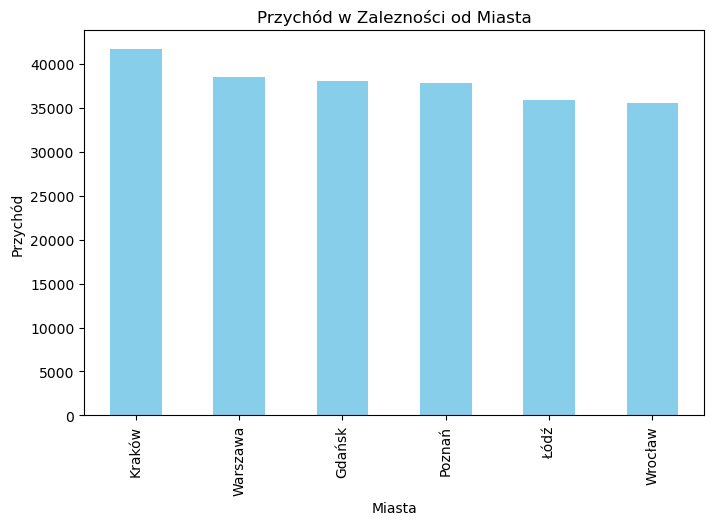

In [66]:
miasta_przychód = df.groupby('city')['total_value'].sum()
miasta_przychód
miasto_max = miasta_przychód.idxmax()
miasto_max_wartosc = miasta_przychód.max()
print(f"Najwiekszy przychód ma: {miasto_max} - {miasto_max_wartosc}")
plt.figure(figsize = (8,5))
miasta_przychód.sort_values(ascending = False).plot(kind='bar', color = 'skyblue')
plt.title("Przychód w Zalezności od Miasta")
plt.xlabel("Miasta")
plt.ylabel("Przychód")
plt.show()


Które miasto ma najwiekszy średni koszyk?

In [ ]:
miasta_srednia = df.groupby('city')['total_value'].mean()
miasta_srednia
miasto_max_sr = miasta_srednia.idxmax()
miasto_max_wartosc_sr = miasta_srednia.max()
print(f"Najwiekszy średni koszyk ma: {miasto_max_sr} - {miasto_max_wartosc_sr}")

Najwiekszy przychód ma: Poznań - 490.76623376623377


Liczba zamówień per miasto

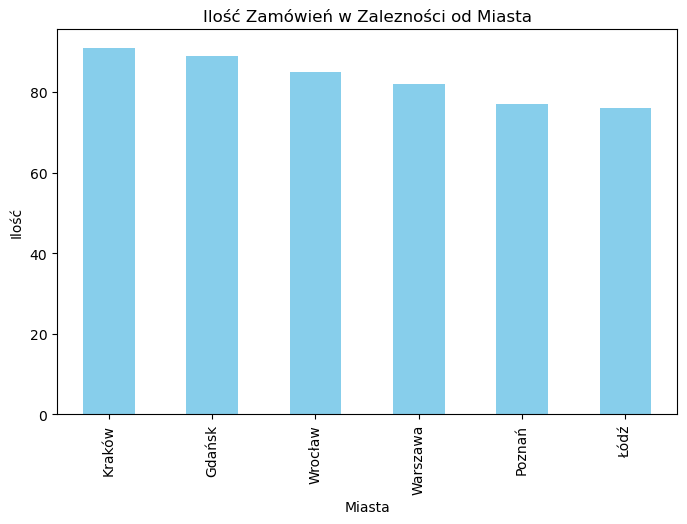

In [67]:
miasta_zamowienia = df.groupby('city')['customer_id'].count()
miasta_zamowienia
plt.figure(figsize = (8,5))
miasta_zamowienia.sort_values(ascending = False).plot(kind='bar', color = 'skyblue')
plt.title("Ilość Zamówień w Zalezności od Miasta")
plt.xlabel("Miasta")
plt.ylabel("Ilość")
plt.show()



# DODATKOWE wykresy

Przychód poszczególnych kategorii produktów

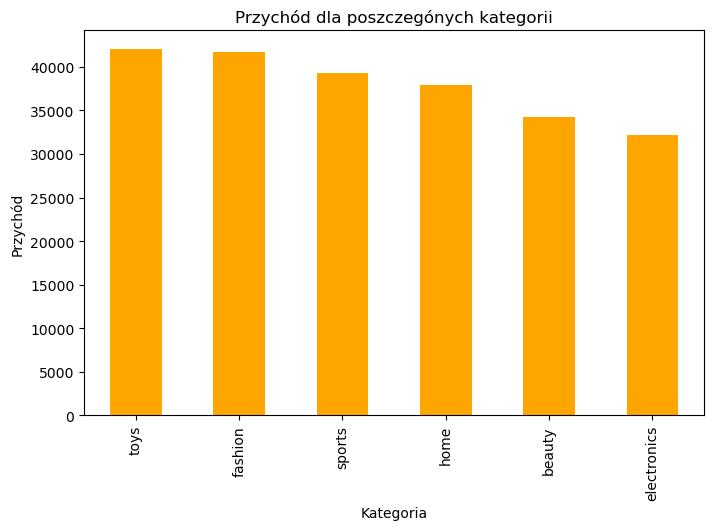

In [70]:
kategorie_przychód = df.groupby('product_category')['total_value'].sum()
plt.figure(figsize = (8,5))
kategorie_przychód.sort_values(ascending = False).plot(kind='bar', color = 'orange')
plt.title("Przychód dla poszczegónych kategorii")
plt.xlabel("Kategoria")
plt.ylabel("Przychód")
plt.show()

Udział miast w przychodzie ogólnym

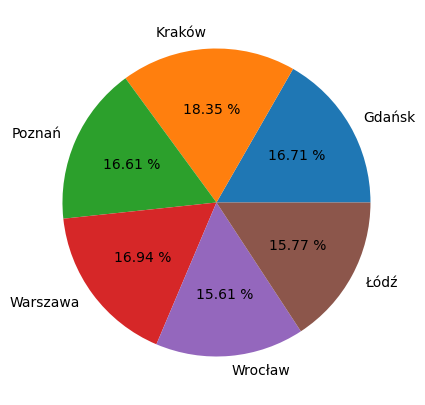

In [ ]:
laczny = df["total_value"].sum()
#łączny = miasta_przychód.sum()
udział_miast = miasta_przychód/laczny *100

plt.figure(figsize = (8,5))
plt.pie(udział_miast, labels =udział_miast.index, autopct ='%.2f %%')
plt.show()
